# Credit Card Fraud Detection

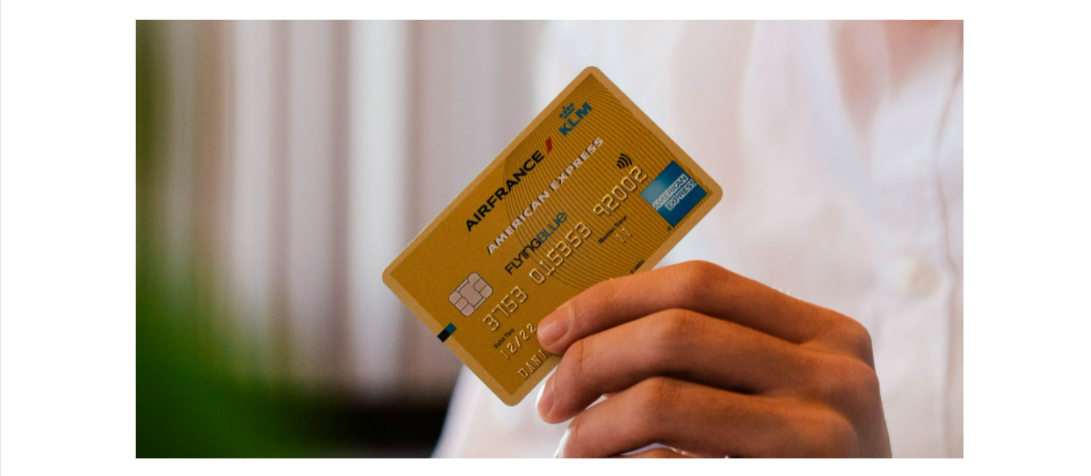



In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

# Variables and Paths

In [53]:
#from google.colab import drive
#drive.mount('/content/drive')

In [54]:
#DATA_PATH = '/content/drive/MyDrive/Data Science/creditcard.csv'

In [55]:
DATA_PATH = r"C:\Users\ChiGa\Desktop\PGD Capstone\creditcard data\creditcard.csv"

# Importing libraries

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [57]:
df = pd.read_csv(DATA_PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
#observe the different feature type present in the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [60]:
# Checking missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [61]:
# Class has to be a categorical variable
df['Class'] = df['Class'].astype(object)

Here we will observe the distribution of our classes

In [62]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [63]:
classes=df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [64]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

df_class = df['Class'].value_counts().to_frame('Count')
df_class.index = ['Non Fraud','Fraud']
df_class['Count'] = df_class['Count']/df.shape[0]
fig = px.bar(df_class, x=df_class.index, y="Count", color="Count", title="Long-Form Input")
fig.show()

<AxesSubplot:xlabel='Class', ylabel='Time'>

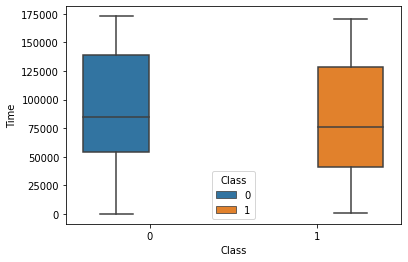

In [65]:
# Create a scatter plot to observe the distribution of classes with time
sns.boxplot(x=df['Class'], y=df['Time'], hue=df['Class'])


<AxesSubplot:xlabel='Time', ylabel='Class'>

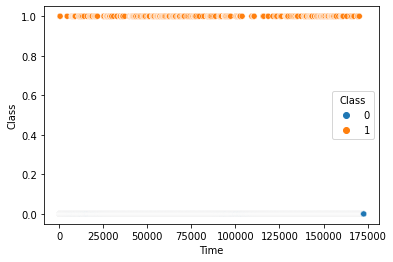

In [66]:
sns.scatterplot(y=df['Class'], x=df['Time'], hue=df['Class'])

<AxesSubplot:xlabel='Amount', ylabel='Class'>

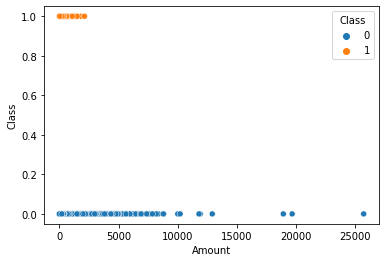

In [67]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(y=df['Class'], x=df['Amount'], hue=df['Class'])

<AxesSubplot:xlabel='Class', ylabel='Amount'>

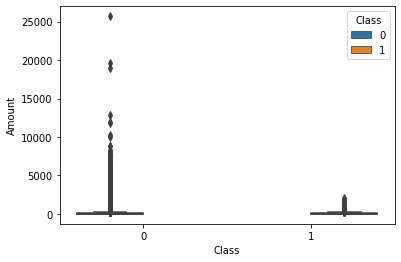

In [68]:
sns.boxplot(x=df['Class'], y=df['Amount'], hue=df['Class'])

In [69]:
cols = df.columns
cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
len(cols)

30

In [70]:
#Creating a plot function
def distPlot(num_cols,df):
  plt.figure(figsize=[30,20])
  for col in num_cols:
    a=num_cols.index(col)+1
    plt.subplot(10,3,a)
    sns.distplot(df[col]).set(title='Dist plot for '+col, xlabel=col)
  plt.tight_layout(pad=2.0)
  plt.show()

In [71]:
_trans_col = ['Time', 'V1', 'V4','V5', 'V6', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

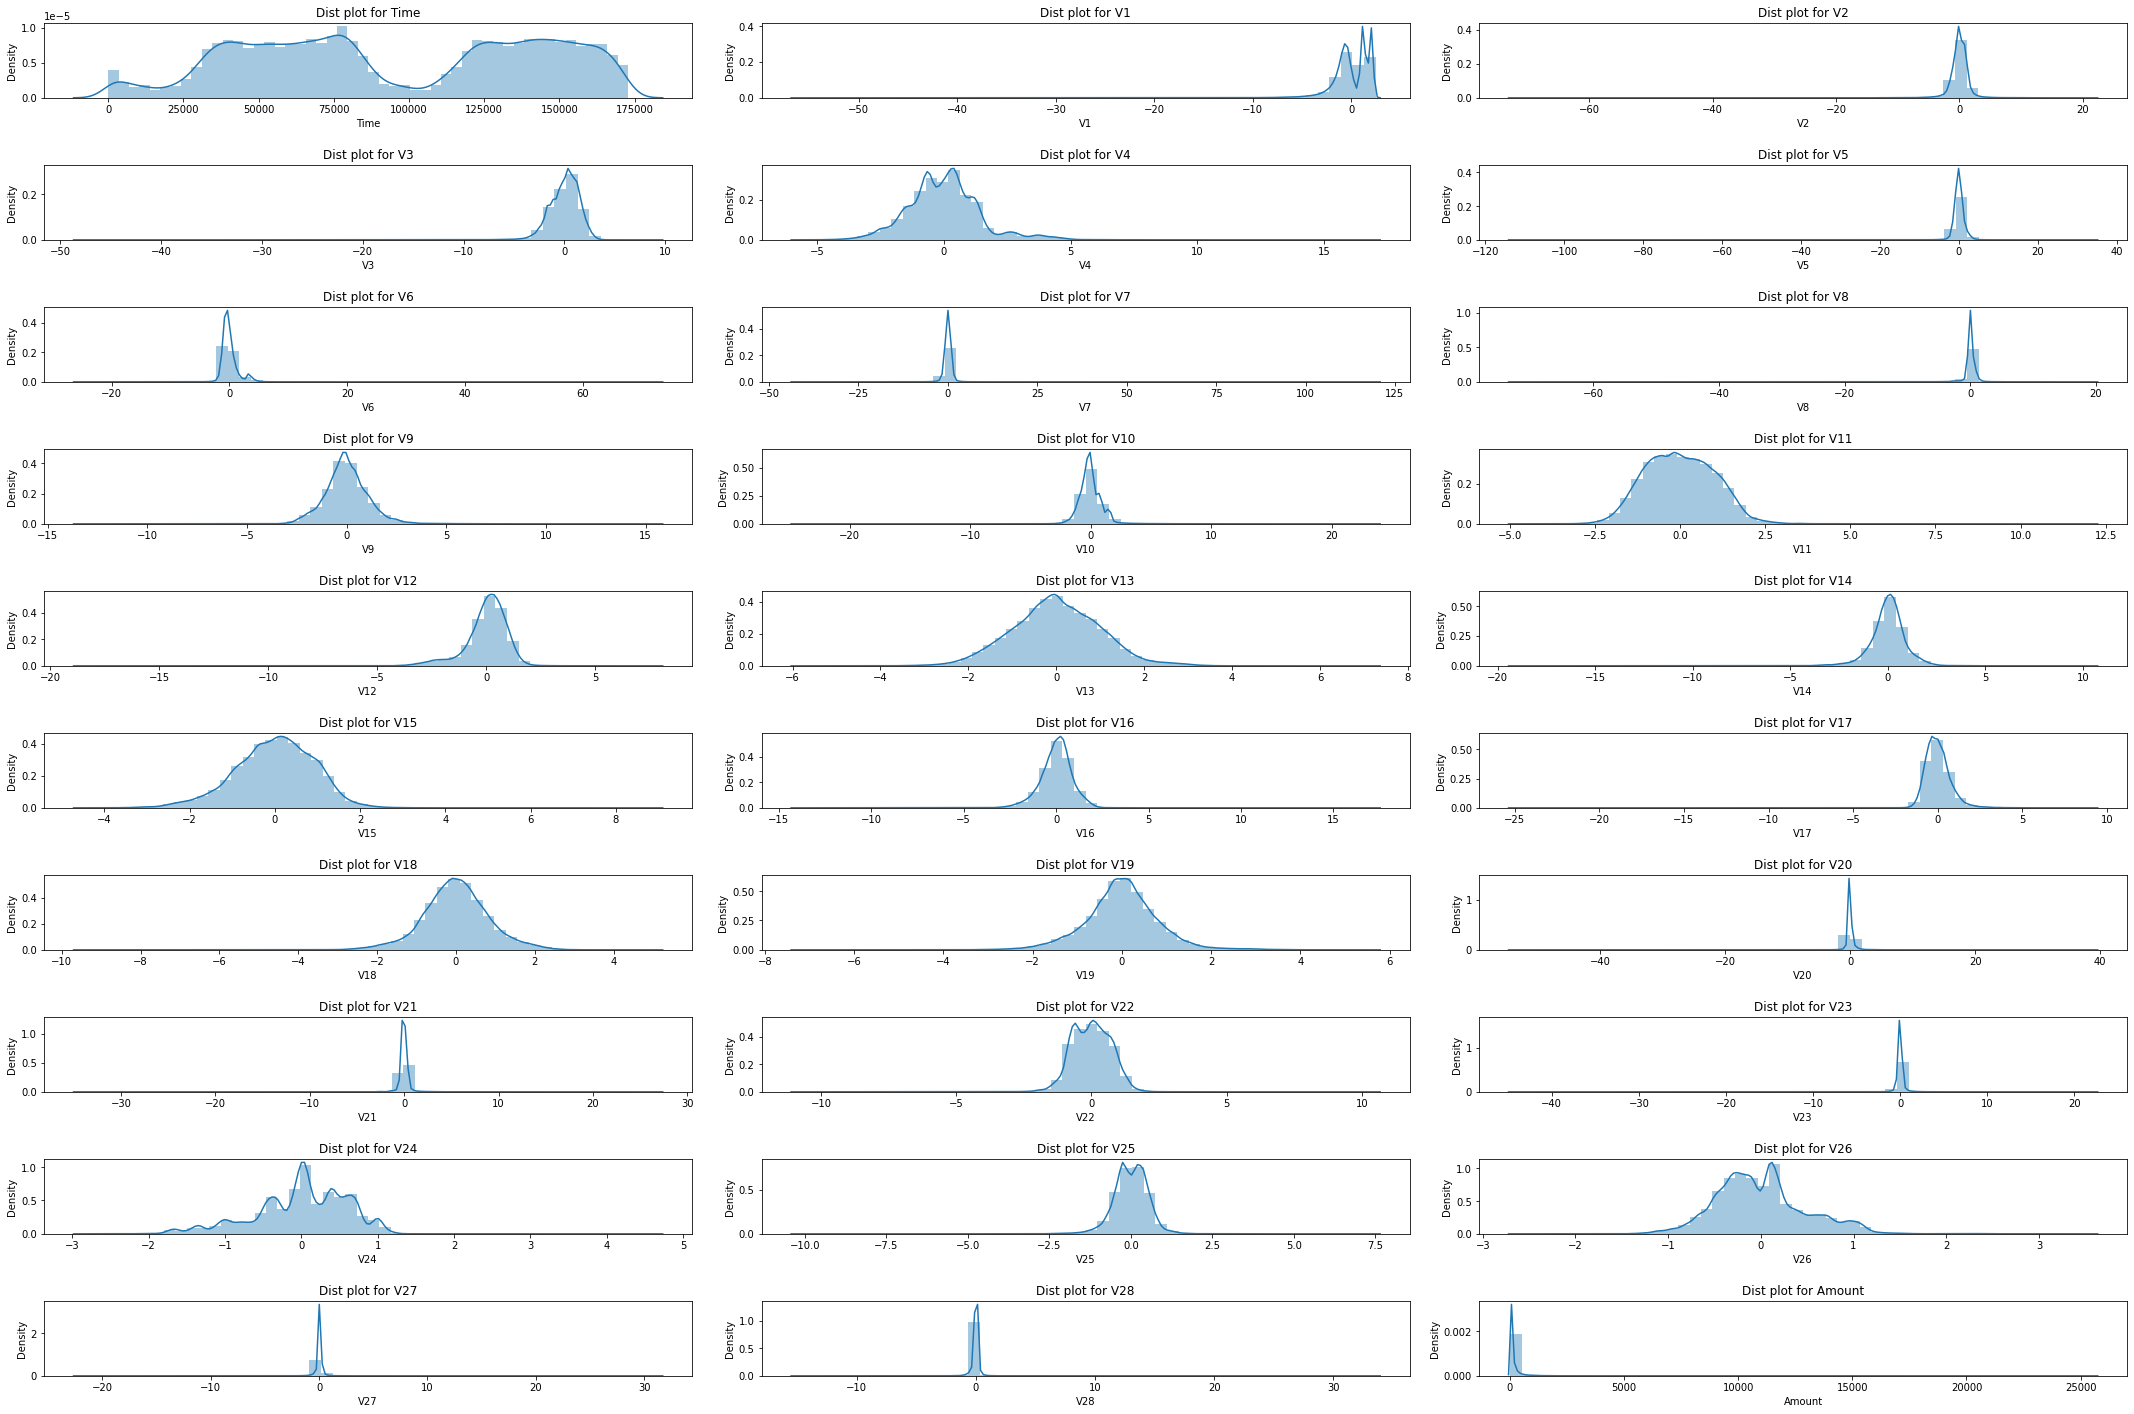

In [72]:
distPlot(cols,df)

# DO SOME OUTLIER TREATMENT ---^

<Figure size 2160x2160 with 0 Axes>

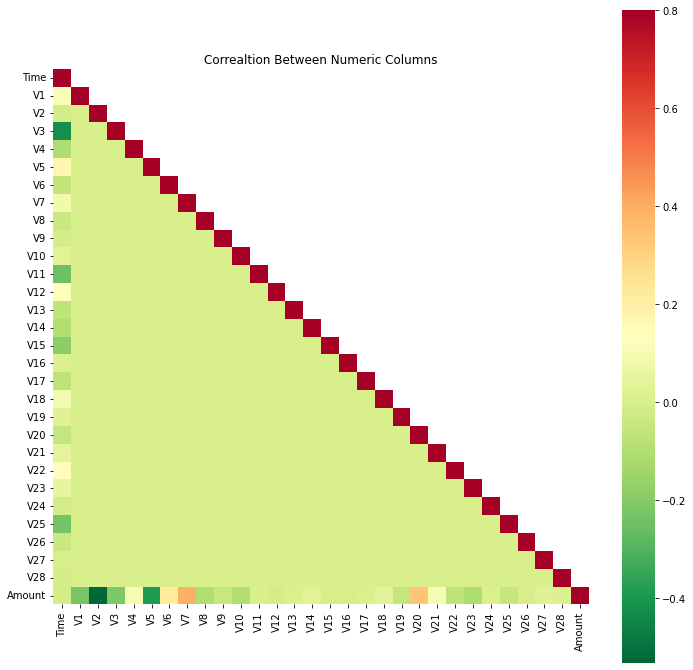

In [73]:
plt.figure(figsize=[30,30])
corr_mat = df[cols].corr()
corr_mat_mask = np.array(corr_mat)
# Creating a heatmap
corr_mat_mask[np.tril_indices_from(corr_mat)] = False
plt.figure(figsize=[12,12])
sns.heatmap(corr_mat, mask=corr_mat_mask, vmax=.8, square=True, annot=False, cmap='RdYlGn_r').set(title='Correaltion Between Numeric Columns');
plt.show()

In [74]:
# Drop unnecessary columns

# TO BE DONE  ---^

### Splitting the data into train & test data

In [75]:
y = df['Class']
X = df.drop('Class',axis=1)

In [76]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [77]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
339
153


### Plotting the distribution of a variable

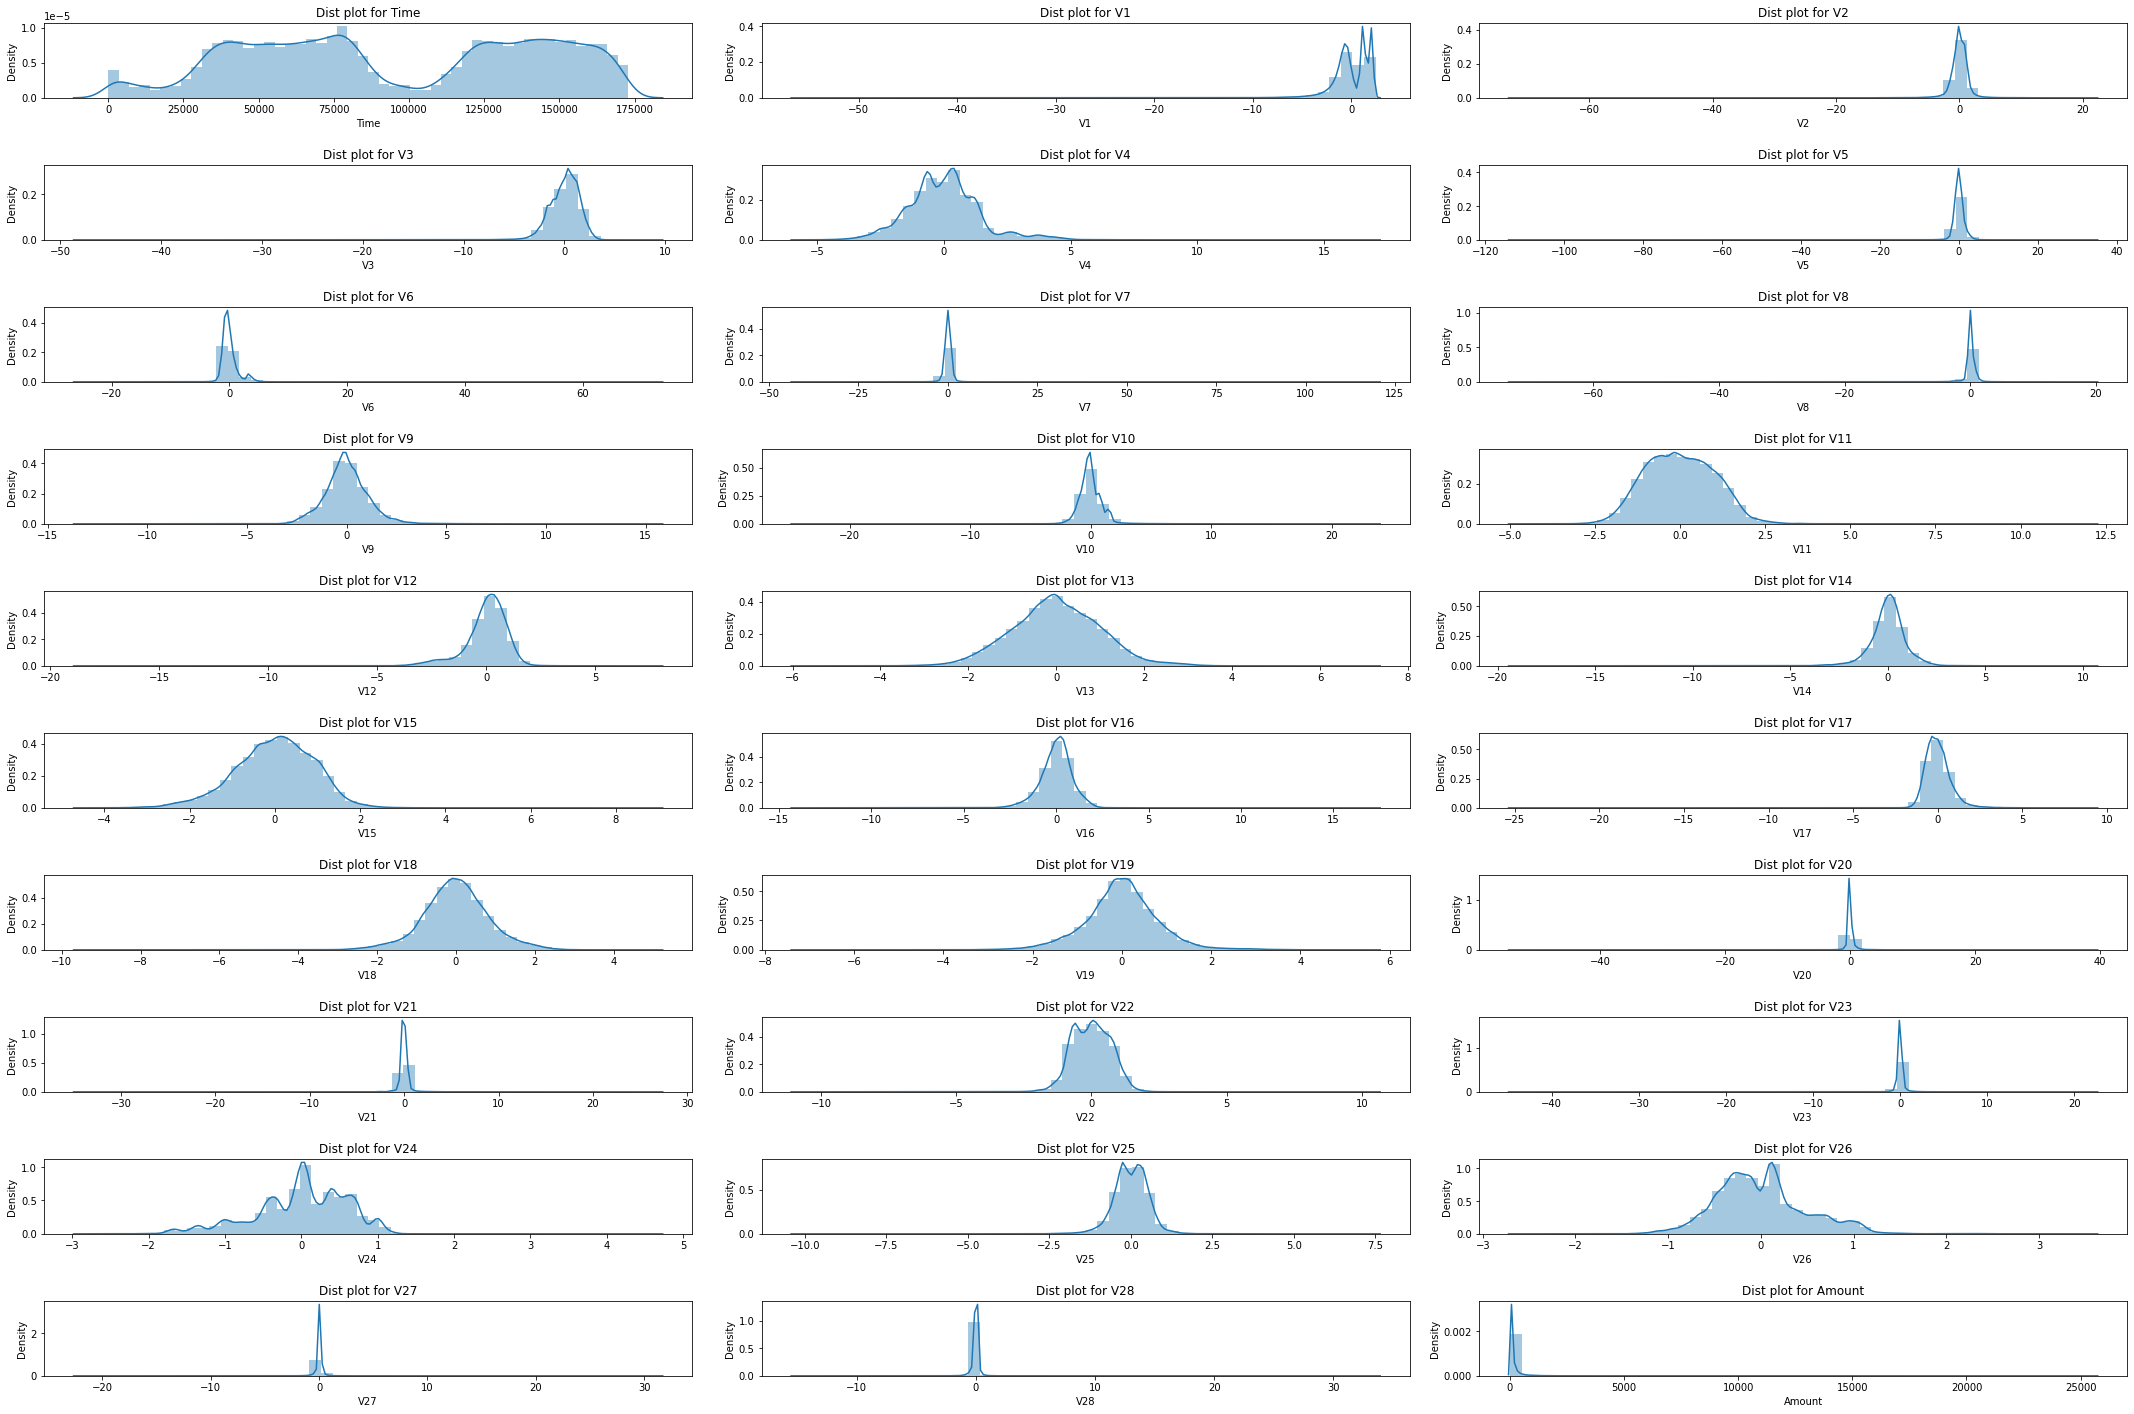

In [78]:
# plot the histogram of a variable from the dataset to see the skewness
distPlot(cols,df)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [79]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
df_transformed = df.copy()

from sklearn.preprocessing import PowerTransformer

trans_cols = _trans_col

pt = PowerTransformer()


_X_train_transformed = pt.fit_transform(X_train[trans_cols])
_X_test_transformed = pt.fit_transform(X_test[trans_cols])

_df_xtrain_transformed = pd.DataFrame(_X_train_transformed)
_df_xtest_transformed = pd.DataFrame(_X_test_transformed)

In [80]:
_df_xtrain_transformed.columns = _trans_col

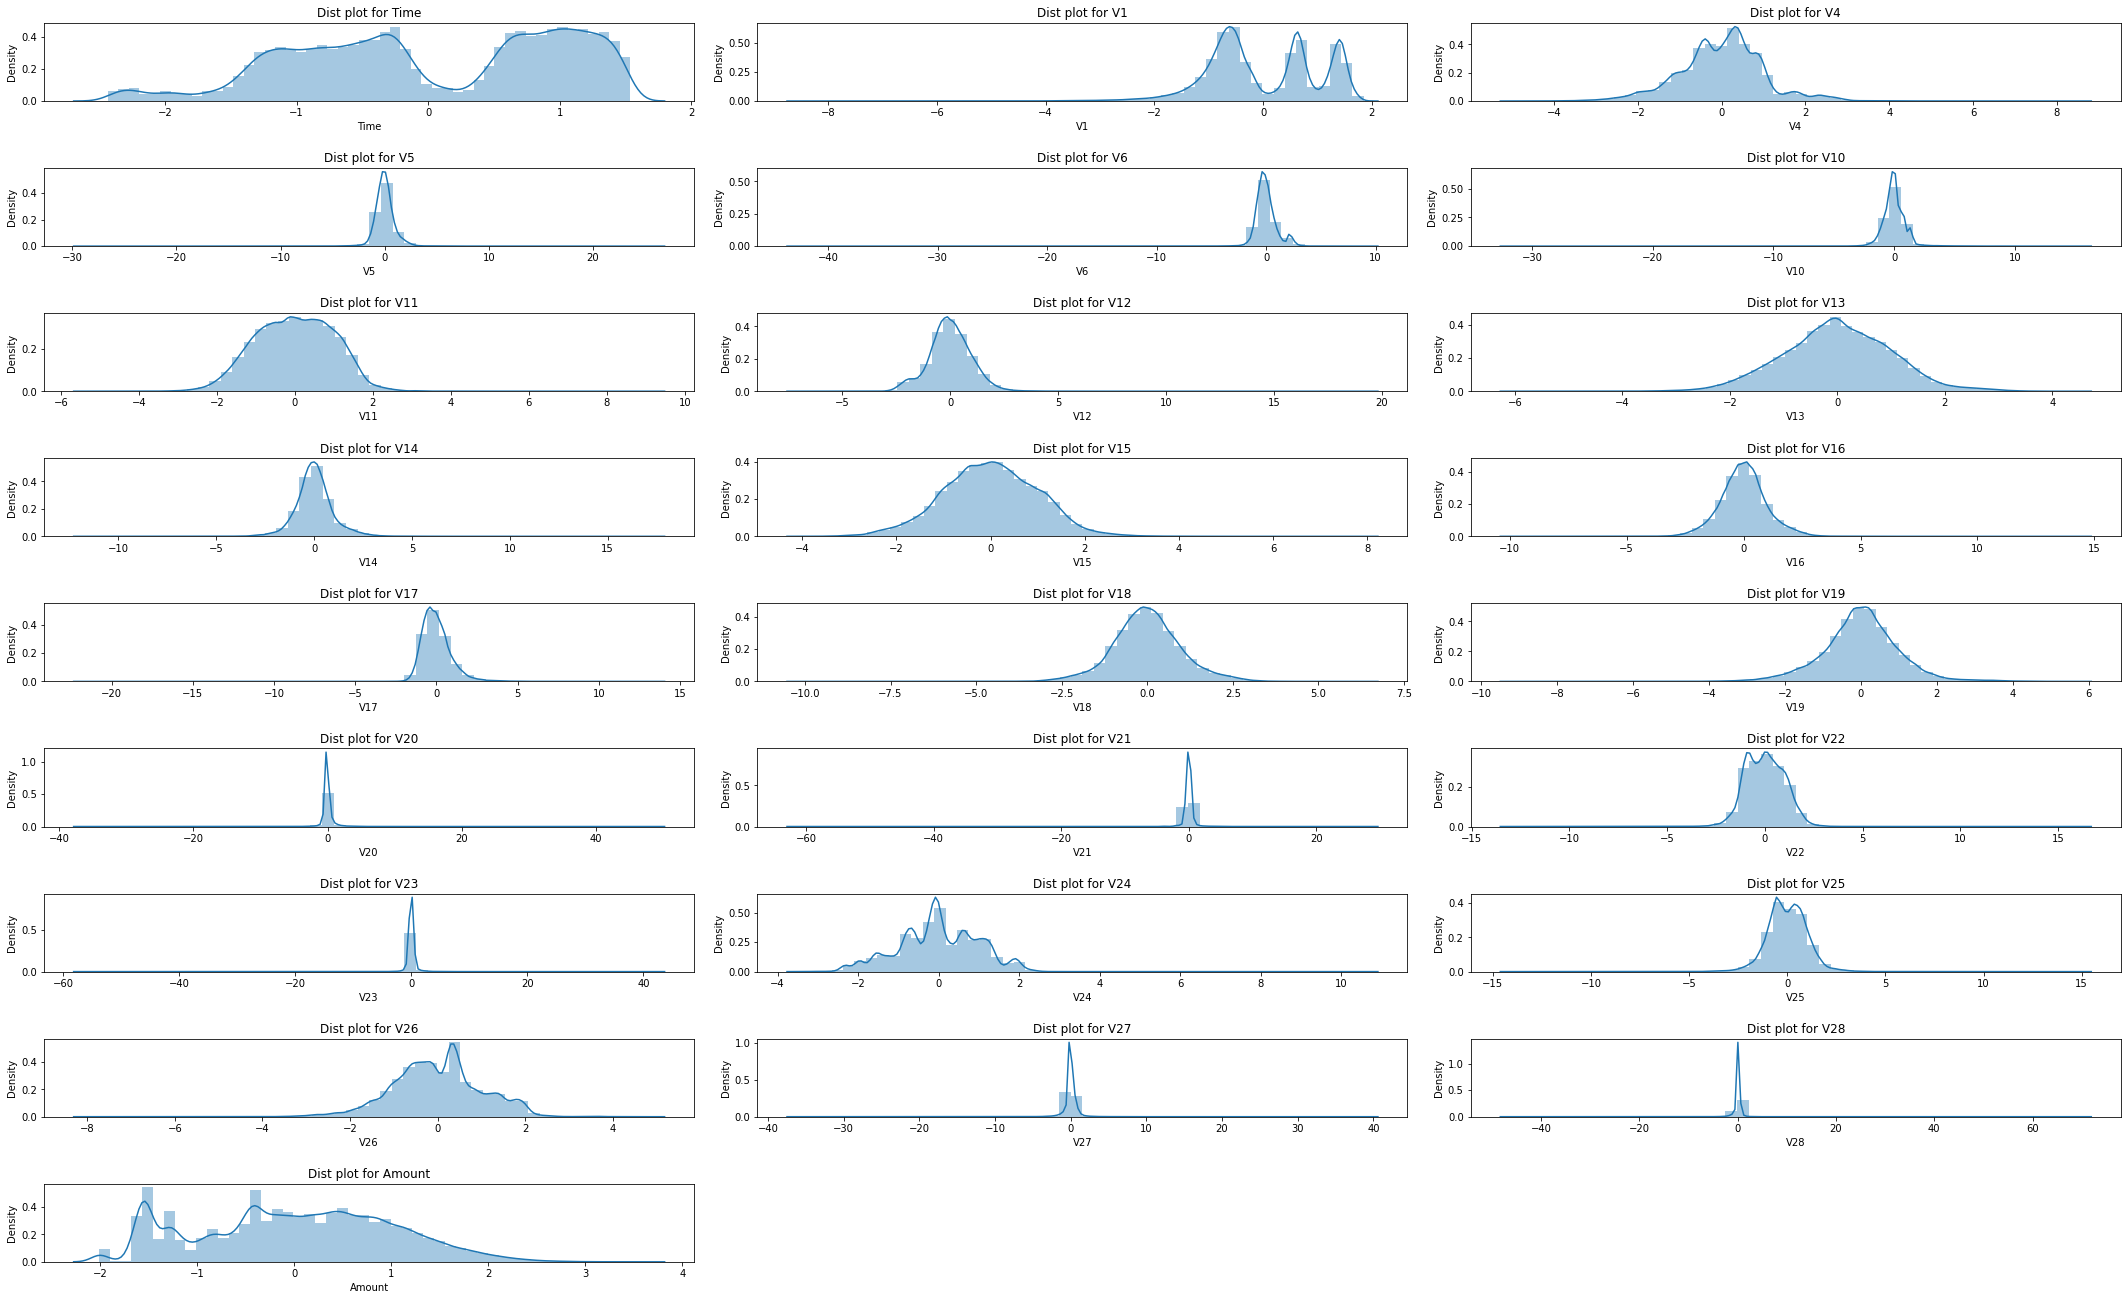

In [81]:
# plot the histogram of a variable from the dataset again to see the result 

#df_trans
#sns.distplot(df_trans['time']).set(title='Dist plot for '+col, xlabel=col)
#plt.tight_layout(pad=2.0)
#plt.show()

distPlot(trans_cols,_df_xtrain_transformed)

## Model Building
- Build different models on the imbalanced dataset and see the result

In [82]:
# Logistic Regression
from sklearn import linear_model #import the package

#num_C = ______  #--> list of values
Logreg = linear_model.LogisticRegression()
cv_num =  [5,7,9,10] #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [83]:
#y_train.value_counts()
y_train = y_train.astype('int')

In [84]:
#perform cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logreg, X_train, y_train,  error_score="raise", cv=5)

print(scores)
print('The average accuracy over all the folds is %.2f' % np.mean(scores))

[0.99884634 0.99892158 0.99919745 0.9986457  0.99879615]
The average accuracy over all the folds is 1.00


In [85]:
#perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#params = {''}

#GS  = GridSearchCV(Logreg, param_grid = params)

In [86]:
#print the evaluation result by choosing a evaluation metric
from sklearn.metrics import classification_report, confusion_matrix

Logreg.fit(X_train,y_train)

y_train_pred = Logreg.predict(X_train)

class_report = classification_report(y_train_pred, y_train)

conf_mat = confusion_matrix(y_train_pred, y_train)
conf_mat

array([[198928,    125],
       [    97,    214]], dtype=int64)

In [87]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199053
           1       0.63      0.69      0.66       311

    accuracy                           1.00    199364
   macro avg       0.82      0.84      0.83    199364
weighted avg       1.00      1.00      1.00    199364



In [88]:
#print the optimum value of hyperparameters


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

RFC.fit(X_train,y_train)


RandomForestClassifier()

In [90]:
y_train_pred_RFC = RFC.predict(X_train)
class_report = classification_report(y_train_pred_RFC, y_train)

conf_mat = confusion_matrix(y_train_pred_RFC, y_train)
print(class_report)
conf_mat

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199025
           1       1.00      1.00      1.00       339

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



array([[199025,      0],
       [     0,    339]], dtype=int64)

In [91]:
#params = {'n_estimators':[100,200], 'min_samples_leaf':[50,100],'max_depth':[20,30],'criterion':['gini', 'entropy']}

#GS  = GridSearchCV(RFC, param_grid = params)

#GS.fit(X_train,y_train)

#print(GS.best_estimator_)
#print(GS.best_score)
#print(GS.best_params)

In [92]:
RFC.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [94]:
clf = RandomForestClassifier()  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

y_train_pred_RFC = clf.predict(X_train)
#class_report = classification_report(y_test_pred_RFC, y_test)
print(len(y_train_pred_RFC))
print(len(y_train))
conf_mat = confusion_matrix(y_train,y_train_pred_RFC)
#print(class_report)
conf_mat

199364
199364


array([[199025,      0],
       [     0,    339]], dtype=int64)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 13
3rd Top var = 15


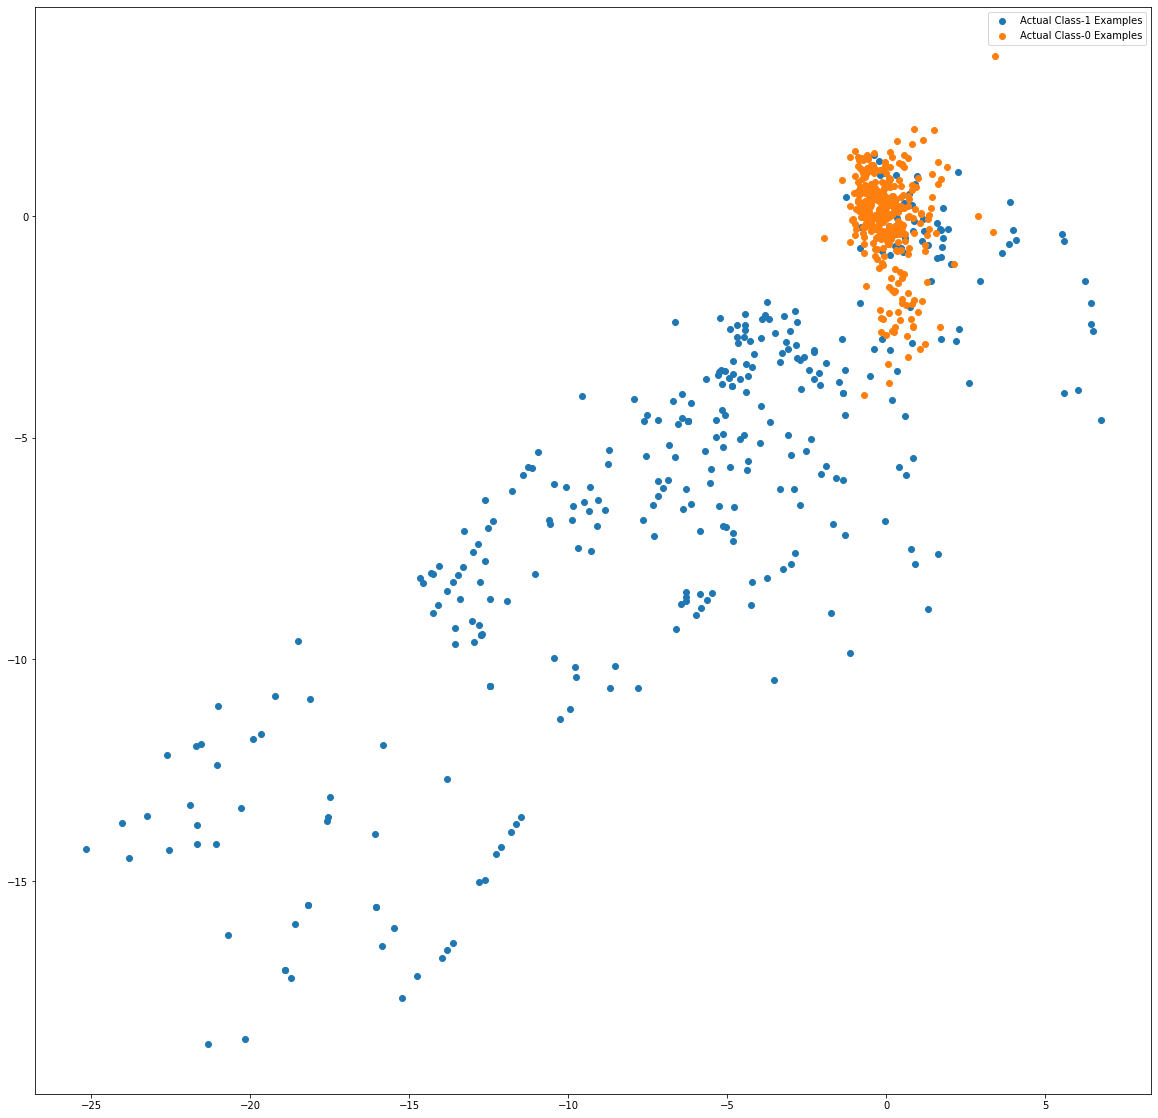

In [95]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [96]:
# Logistic Regression
from sklearn import linear_model #import the package

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [99]:
pip install imblearn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python39\\Lib\\site-packages\\~klearn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [101]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


ModuleNotFoundError: No module named 'imblearn'

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [97]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

NameError: name 'over_sampling' is not defined

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)